### Analyse pesticide-use in in the United States in 2014 and in 2015

In [1]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

from Starts.startml import *
from Starts.startvis import *
from Starts.startspk import *
%matplotlib inline

local_kwargs {'data_path': './data/2014.csv , ./data/2015.csv , ./data/dictionary.csv', 'drop_obj_col': False, 'nan_drop_col': False, 'nan_drop_row': False, 'nan_zero': False, 'nan_mean': True, 'nan_mean_neighbors': False}


In [2]:
use2014 = data[0]
use2014.head()

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE
0,"2,4-D",2014,1,1,1698.6,1885.5
1,"2,4-D",2014,1,3,7513.6,8472.4
2,"2,4-D",2014,1,5,2613.6,2889.4
3,"2,4-D",2014,1,7,1259.2,1277.7
4,"2,4-D",2014,1,9,7590.5,7756.1


In [3]:
use2015 = data[1]
use2015.head()

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE
0,1-Methyl Cyclopropene,2015,41,1,NaN,0.0
1,1-Methyl Cyclopropene,2015,41,21,NaN,0.1
2,1-Methyl Cyclopropene,2015,41,27,NaN,1.7
3,1-Methyl Cyclopropene,2015,41,49,NaN,0.1
4,1-Methyl Cyclopropene,2015,41,55,NaN,0.0


In [4]:
states = data[2]
states.head()

,STATE_CODE,COUNTY_CODE,COUNTY,STATE
0,1,1,Autauga County,AL
1,1,3,Baldwin County,AL
2,1,5,Barbour County,AL
3,1,7,Bibb County,AL
4,1,9,Blount County,AL


In [5]:
d2014_states = use2014.merge(states, how='left', on=['STATE_CODE', 'COUNTY_CODE'])
d2015_states = use2015.merge(states, how='left', on=['STATE_CODE', 'COUNTY_CODE'])

In [6]:
len(d2014_states), len(d2015_states)

(392433, 369763)

In [7]:
d2014_states.head()

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE,COUNTY,STATE
0,"2,4-D",2014,1,1,1698.6,1885.5,Autauga County,AL
1,"2,4-D",2014,1,3,7513.6,8472.4,Baldwin County,AL
2,"2,4-D",2014,1,5,2613.6,2889.4,Barbour County,AL
3,"2,4-D",2014,1,7,1259.2,1277.7,Bibb County,AL
4,"2,4-D",2014,1,9,7590.5,7756.1,Blount County,AL


In [8]:
d2015_states.head()

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE,COUNTY,STATE
0,1-Methyl Cyclopropene,2015,41,1,NaN,0.0,Baker County,OR
1,1-Methyl Cyclopropene,2015,41,21,NaN,0.1,Gilliam County,OR
2,1-Methyl Cyclopropene,2015,41,27,NaN,1.7,Hood River County,OR
3,1-Methyl Cyclopropene,2015,41,49,NaN,0.1,Morrow County,OR
4,1-Methyl Cyclopropene,2015,41,55,NaN,0.0,Sherman County,OR


In [9]:
list_of_states = states['STATE'].unique()
list_of_states

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'AS', 'GU', 'MP', 'PR',
       'UM', 'VI'], dtype=object)

In [10]:
# Change the State to get information about pesticide-use 
# The Compound used at State AL in 2014
state='AL'
compound_al=d2014_states[d2014_states['STATE']==state]
compound_al_list = compound_al['COMPOUND'].unique()
compound_al_list

array(['2,4-D', '2,4-DB', '6-Benzyladenine', 'Abamectin', 'Acephate',
       'Acetochlor', 'Acifluorfen', 'Alachlor', 'Aminopyralid', 'Atrazine',
       'Azoxystrobin', 'Bacillus Cereus', 'Bacillus Firmus',
       'Bacillus Thuringiensis', 'Bensulide', 'Bentazone', 'Bifenthrin',
       'Boscalid', 'Bromoxynil', 'Captan', 'Carbaryl', 'Carboxin',
       'Carfentrazone-Ethyl', 'Chlorantraniliprole', 'Chlorimuron',
       'Chloropicrin', 'Chlorothalonil', 'Chlorpyrifos', 'Chlorsulfuron',
       'Clethodim', 'Clomazone', 'Clopyralid', 'Cloransulam-Methyl',
       'Clothianidin', 'Copper Hydroxide', 'Copper Sulfate', 'Cyclanilide',
       'Cyfluthrin', 'Cyhalothrin-Gamma', 'Cyhalothrin-Lambda',
       'Cypermethrin', 'Cyproconazole', 'Cytokinin', 'Diazinon', 'Dicamba',
       'Dichloropropene', 'Dichlorprop', 'Diclosulam', 'Dicofol',
       'Dicrotophos', 'Difenoconazole', 'Diflubenzuron', 'Diflufenzopyr',
       'Dimethenamid-P', 'Dimethoate', 'Dinotefuran', 'Diquat', 'Diuron',
       'Dodi

In [11]:
al_cl = [(cl, len(compound_al[compound_al['COMPOUND']==cl])) for cl in compound_al_list]
al_cl    

[('2,4-D', 67),
 ('2,4-DB', 59),
 ('6-Benzyladenine', 32),
 ('Abamectin', 57),
 ('Acephate', 63),
 ('Acetochlor', 67),
 ('Acifluorfen', 57),
 ('Alachlor', 41),
 ('Aminopyralid', 67),
 ('Atrazine', 67),
 ('Azoxystrobin', 67),
 ('Bacillus Cereus', 51),
 ('Bacillus Firmus', 67),
 ('Bacillus Thuringiensis', 18),
 ('Bensulide', 24),
 ('Bentazone', 57),
 ('Bifenthrin', 67),
 ('Boscalid', 67),
 ('Bromoxynil', 22),
 ('Captan', 64),
 ('Carbaryl', 67),
 ('Carboxin', 22),
 ('Carfentrazone-Ethyl', 51),
 ('Chlorantraniliprole', 10),
 ('Chlorimuron', 65),
 ('Chloropicrin', 39),
 ('Chlorothalonil', 67),
 ('Chlorpyrifos', 67),
 ('Chlorsulfuron', 47),
 ('Clethodim', 66),
 ('Clomazone', 66),
 ('Clopyralid', 26),
 ('Cloransulam-Methyl', 65),
 ('Clothianidin', 67),
 ('Copper Hydroxide', 66),
 ('Copper Sulfate', 24),
 ('Cyclanilide', 51),
 ('Cyfluthrin', 67),
 ('Cyhalothrin-Gamma', 47),
 ('Cyhalothrin-Lambda', 67),
 ('Cypermethrin', 67),
 ('Cyproconazole', 44),
 ('Cytokinin', 51),
 ('Diazinon', 64),
 ('Dic

In [12]:
x = [a[0] for a in al_cl]
y = tuple([a[1] for a in al_cl])
df = pd.DataFrame.from_records([y], columns=x)
df

,"2,4-D","2,4-DB",6-Benzyladenine,Abamectin,Acephate,Acetochlor,Acifluorfen,Alachlor,Aminopyralid,Atrazine,...,Topramezone,Triadimenol,Tribenuron Methyl,Tribufos,Triclopyr,Trifloxystrobin,Trifloxysulfuron,Trifluralin,Zeta-Cypermethrin,Ziram
0,67,59,32,57,63,67,57,41,67,67,...,9,51,61,51,67,67,51,66,66,34


In [13]:
# The most used compound
df.idxmax(axis=1), df['2,4-D'].values

(0    2,4-D
 dtype: object, array([67]))

In [14]:
# The least used compound
df.idxmin(axis=1), df['Linuron'].values

(0    Linuron
 dtype: object, array([8]))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

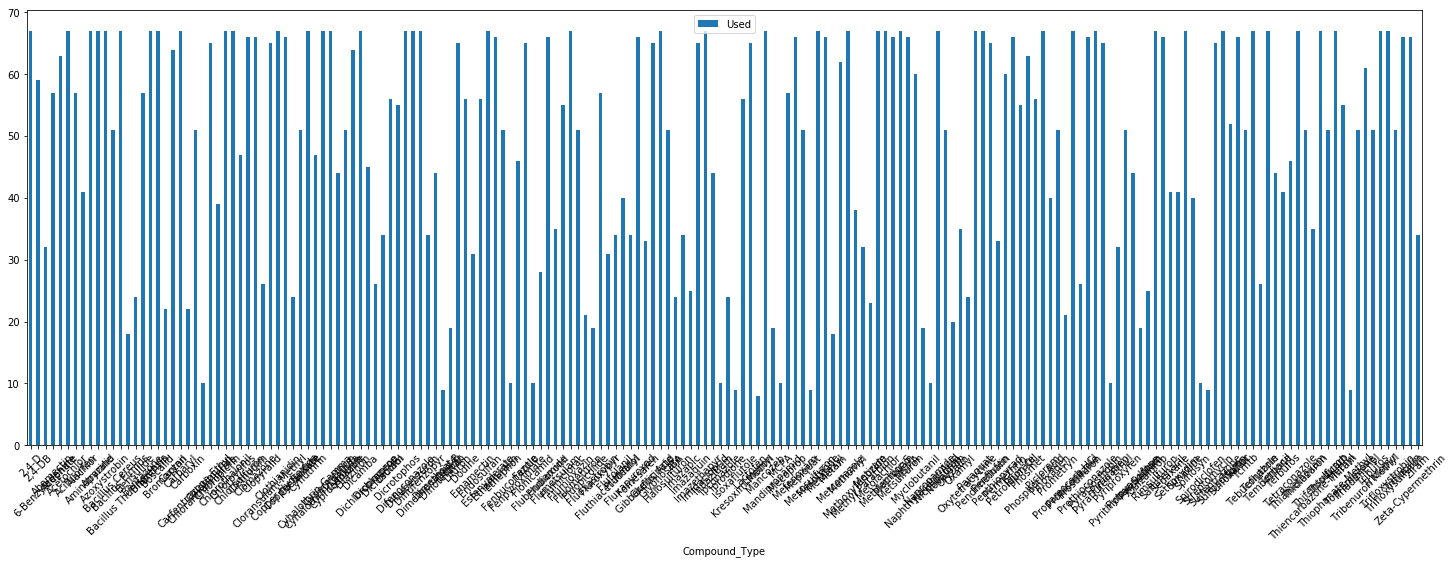

In [15]:
# Visual the used compound at State AL
df2 = pd.DataFrame(data=al_cl, columns=['Compound_Type', 'Used'])
df2.plot(x='Compound_Type', y='Used', figsize=(25,8), kind='bar')
plt.xticks(rotation=45)